# <center>**HOUSING IN KENYA**</center>

## **Introduction**

The Kenyan housing market is influenced by various factors that dictate property prices. Among these factors, size and location stand out as key influencers.  This project aims to delve into these dynamics through exploratory data analysis (EDA), aiming to unveil the relative impact of size and location on housing prices. Its objective is to offer valuable insights to homeowners, investors, and policymakers.

The dataset utilized for this analysis is sourced from [Kaggle](https://www.kaggle.com/datasets/iamasteriix/rental-apartments-in-kenya) and is provided in CSV format, comprising several key columns essential for investigating housing prices in Kenya. The dataset includes the following columns:
1. **Agency:** This column denotes the agency responsible for listing the property.
2. **Neighborhood:** Represents the locality or neighborhood where the property is situated, providing insights into its geographical location.
3. **Price:** Indicates the monetary value associated with the property, serving as the primary target variable for the analysis.
4. **Link:** This column contains hyperlinks or references to additional information related to the properties, offering a potential avenue for further exploration.
5. **sq_mtrs:** Reflects the size of the property in square meters, a crucial determinant of its physical dimensions and potential utility.
6. **Bedrooms:** Specifies the number of bedrooms available within the property, offering insights into its accommodation capacity.
7. **Bathrooms:** Represents the count of bathrooms within the property, providing additional information on its amenities and functionality.

## **Data Preparation**

In the data preparation section, the dataset sourced from Kaggle is prepared for analysis of housing prices in Kenya. This phase involves steps such as loading the dataset into the Jupyter Notebook environment, exploring its structure and contents, and addressing any missing or inconsistent data.

In [1]:
# importing the libraries to be used.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# laoding the data into a pandas dataframe.
housing_dataframe = pd.read_csv('data\housing_in_kenya_data.csv')

In [3]:
# getting a viev of the dataframe.
housing_dataframe.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [4]:
# inspecting the data
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


Upon inspection of the data frame it is observed that there are null values in the data set and columns that we need to modify.
We will start by dropping the null values.

In [5]:
# dropping null values
housing_dataframe.dropna(inplace = True)

Next, we perform the following on the data: 
1. Drop the `link` and `Agency` columns as we won't use it for our analysis. 
2. We create a new column named `Estate` from the `Neighborhood` column and drop the `Neighborhood` column. 
3. We convert the values of the `Price` column to floating point numbers and then rename the column to `Price_Ksh`.
4. Due to inconsistencies, such as unrealistically small values, the `sq_mtrs` column is dropped, with `Bedrooms` serving as a reliable size indicator.

In [6]:
# dropping the link, Agency and sq_mtrs columns.
housing_dataframe.drop(columns = ['link', 'sq_mtrs', 'Agency'], inplace = True)

# Creating Estate column from the Neighborhood column
housing_dataframe['Estate'] = (housing_dataframe['Neighborhood']
                               .str
                               .split(",")
                              .apply(lambda x: x[-1]))

# dropping the Neighborhood column.
housing_dataframe.drop(columns = ['Neighborhood'], inplace = True)

# converting price values to floating point numbers and renaming the column to Price_Ksh.
housing_dataframe['Price'] = (housing_dataframe['Price']
                              .str.replace("KSh ", "")
                              .str.replace(",", "")
                              .astype(float))

# renaming the column
housing_dataframe = (housing_dataframe
                     .rename(
                         columns = {'Price':'Price_Ksh'}
                     ))

# casting Bedrooms and Bathrooms columns to integers.
housing_dataframe[['Bedrooms', 'Bathrooms']] = housing_dataframe[['Bedrooms', 'Bathrooms']].astype(int)

housing_dataframe.head()

,Price_Ksh,Bedrooms,Bathrooms,Estate
0,155000.0,4,4,Westlands
1,100000.0,3,4,Dagoretti North
2,75000.0,3,5,Dagoretti North
3,135000.0,3,4,Dagoretti North
6,100000.0,2,3,Dagoretti North


In [7]:
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 0 to 1846
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price_Ksh  1557 non-null   float64
 1   Bedrooms   1557 non-null   int32  
 2   Bathrooms  1557 non-null   int32  
 3   Estate     1557 non-null   object 
dtypes: float64(1), int32(2), object(1)
memory usage: 48.7+ KB


## **Exploratory Data Analysis**

In the data Exploratory Data Analysis section, we embark on a comprehensive exploration of the housing dataset. Here, we delve into descriptive statistics, uncovering key insights into the distribution and relationships among variables such as house prices, size, and location. Through visually informative plots and statistical analyses, we aim to gain a deeper understanding of the underlying patterns and trends within the data.

Here are the questions we will answer:
1. How does the average house price compare across different Estates?
2. How do the average house prices vary across different categories of bedrooms (e.g., 1 bedroom, 2 bedrooms, etc.)?
3. How do the average house prices vary across different categories of bathrooms (e.g., 1 bathroom, 2 bathrooms, etc.)?
4. What is the distribution of house prices?

**Descriptive Statistics**

In [8]:
# descriptive statistics of the numerical values
housing_dataframe.describe()

,Price_Ksh,Bedrooms,Bathrooms
count,1557.000000,1557.000000,1557.000000
mean,98339.751445,2.597303,2.595376
std,40175.785665,0.808259,1.000349
min,12000.000000,0.000000,1.000000
25%,70000.000000,2.000000,2.000000
50%,95000.000000,3.000000,2.000000
75%,130000.000000,3.000000,3.000000
max,240000.000000,6.000000,6.000000


**Distribution of the `Price_Ksh`, `Bedrooms` and `Bathrooms`.**

Text(0.5, 1.0, 'Distribution of Bathrooms')

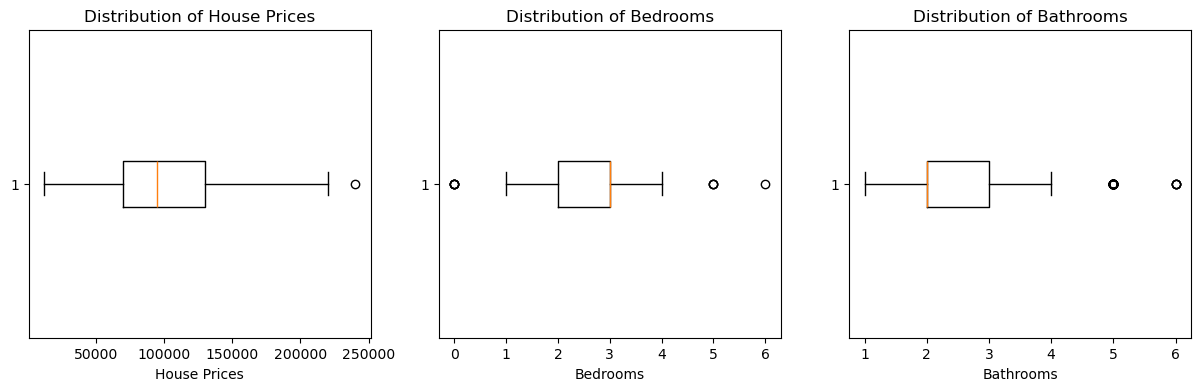

In [9]:
# creating a 1 by 3 grid for the boxplots
fig, axs = plt.subplots(1, 3, figsize = (15, 4))

# plots for each variable
axs[0].boxplot(housing_dataframe['Price_Ksh'], vert = False)  # boxplot for Price_Ksh
axs[0].set_xlabel('House Prices')
axs[0].set_title('Distribution of House Prices')

axs[1].boxplot(housing_dataframe['Bedrooms'], vert = False)  # boxplot for Bedrooms
axs[1].set_xlabel('Bedrooms')
axs[1].set_title('Distribution of Bedrooms')

axs[2].boxplot(housing_dataframe['Bathrooms'], vert = False)  # boxplot for Bathrooms
axs[2].set_xlabel('Bathrooms')
axs[2].set_title('Distribution of Bathrooms')

From the boxplots, it's evident that the housing market in Kenya exhibits certain trends. Approximately half of the houses in the dataset are priced above Ksh. 100,000, indicating a substantial proportion of relatively high-value properties. This suggests that the housing market in Kenya may be skewed towards higher-priced properties, possibly due to factors such as location, size, or amenities. Additionally, the observation that 50% of the houses have three or more bedrooms and 50% have two or more bathrooms reflects a tendency towards larger and more spacious properties. This could be indicative of the preferences or requirements of buyers in the Kenyan housing market, where larger households or individuals seeking more spacious accommodations may drive demand for properties with multiple bedrooms and bathrooms. Overall, these insights provide valuable context for understanding the distribution of housing prices, bedrooms, and bathrooms in Kenya, offering key insights for both buyers and sellers navigating the dynamic housing market landscape.

<Axes: xlabel='Estate', ylabel='Average Price in Ksh'>

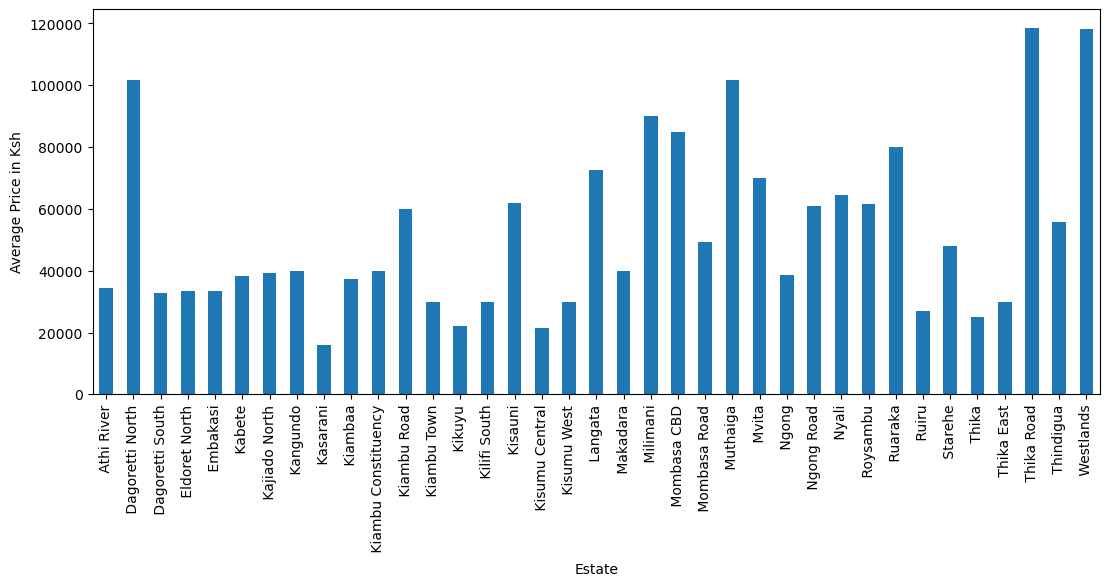

In [10]:
# ploting average house price per Estate.
(housing_dataframe
 .groupby('Estate')['Price_Ksh']
 .mean()).plot(
    kind = "bar",
    xlabel = "Estate",
    ylabel = "Average Price in Ksh",
    figsize = (13,5)
 )

From the bar graph above there appears to be significant variation in average house prices across different estates, indicating disparities in property values depending on the locality. Some estates exhibit notably higher average prices for example **Westlands** and **Thika Road**, suggesting they may be more desirable or prestigious areas. Conversely, estates with lower average prices for example **Kasarani** and **Kikuyu** might offer more affordable housing options. 

Text(0.5, 1.0, 'The Price of a House by the Number of Bathrooms')

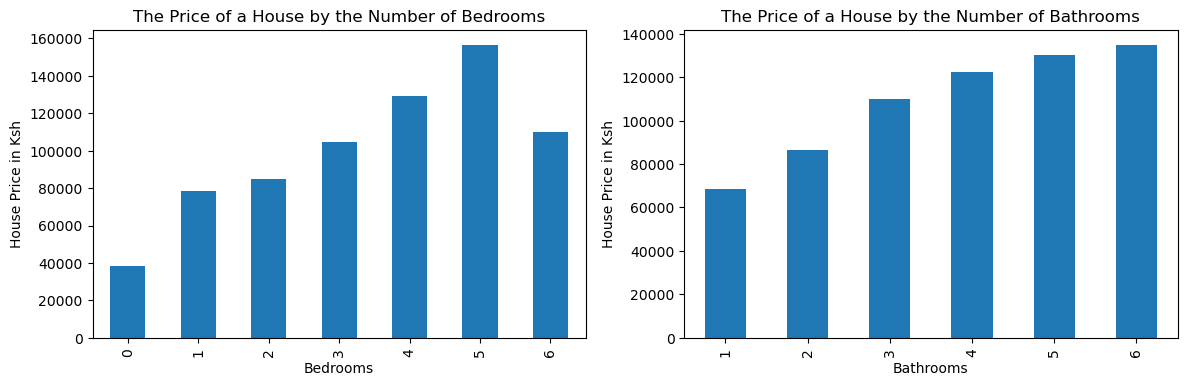

In [11]:
# creating a 1 by 2 grid for the plots
fig, axs = plt.subplots(1, 2, figsize = (14, 4))

# grouping houses by the number of bedrooms and average price.
(housing_dataframe.groupby('Bedrooms')['Price_Ksh']
 .mean()).plot(
    kind = "bar", 
    ax = axs[0]
 )
axs[0].set_ylabel("House Price in Ksh")
axs[0].set_title ("The Price of a House by the Number of Bedrooms")

# grouping houses by the number of bathrooms and average price.
(housing_dataframe.groupby('Bathrooms')['Price_Ksh']
 .mean()).plot(
    kind = 'bar', 
    ax = axs[1]
 )
axs[1].set_ylabel("House Price in Ksh")
axs[1].set_title ("The Price of a House by the Number of Bathrooms")

From the above graph, we observe that the more bedrooms and bathrooms the higher the average house price (except for 6-bedroom houses) i.e **larger properties command higher prices**. This relationship suggests that properties with more bedrooms and/or more bathrooms are generally perceived as more valuable, potentially due to their increased space and accommodation capacity. Such findings align with the basic principles of supply and demand, where larger properties often cater to larger households or individuals seeking more living space, thereby increasing prices. Additionally, this trend underscores the importance of the size and configuration of properties in determining their market value within the housing sector.

## **Insights and Interpretation**

The housing market in Kenya exhibits clear trends, as seen from the boxplots. Around half of the houses in the dataset are priced above Ksh. 100,000, indicating a prevalence of higher-value properties. This suggests that the market may lean towards higher-priced properties, possibly due to factors like location or size. Moreover, 50% of the houses have three or more bedrooms and 50% have two or more bathrooms, signaling a preference for larger properties. This might cater to buyers seeking more space, influencing demand. The bar graph highlights variations in average house prices across different estates, with some, like Westlands and Thika Road, showing notably higher prices, possibly due to desirability. Conversely, estates like Kasarani and Kikuyu offer more affordable options. Additionally, as illustrated above, as the number of bedrooms and bathrooms increases, so does the average house price (except for 6-bedroom houses), indicating larger properties command higher prices. This reflects basic principles of supply and demand, where larger properties cater to larger households, increasing their value. Overall, these insights offer valuable context for understanding housing market dynamics in Kenya, aiding both buyers and sellers in navigating choices effectively.